**Импортирование библиотек**

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt


In [23]:
import phik

In [24]:
df=pd.read_csv(r'D:\vscode_files\python\notebooks\pet_project\vk_case\analytics_test.csv')

In [25]:
df

,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time;;
0,96422511.0,female,68.0,android,89656828.0,передачи о новых технологиях,show,share,6.0,playlist,0;;
1,45247030.0,male,62.0,android_tv,89784877.0,автопрому новости,news,search,0.0,NaN,0;;
2,79572413.0,male,12.0,web,10555855.0,логистическое законодательство,news,search,0.0,NaN,0;;
3,821317.0,female,58.0,android_tv,72054848.0,банковские премии новости,news,search,0.0,NaN,0;;
4,6206023.0,female,24.0,android,20838049.0,вики шоу аманда,show,subscribe,7.0,author,0;;
...,...,...,...,...,...,...,...,...,...,...,...
19995,96140045.0,anonym,0.0,web,41018546.0,мем с грустным скрипачом,music,search,0.0,NaN,0;;
19996,49729858.0,male,26.0,android,3409043.0,музыка из советских фильмов,music,like,12.0,clip,0;;
19997,83070163.0,anonym,0.0,iphone,68120968.0,допрос шоу нурлан,show,search,0.0,NaN,0;;
19998,23171813.0,female,23.0,android_tv,28022664.0,кстати шоу жу,show,search,0.0,NaN,0;;


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         19509 non-null  float64
 1   sex             19509 non-null  object 
 2   age             19509 non-null  float64
 3   platform        19509 non-null  object 
 4   query_id        19509 non-null  float64
 5   query_text      19509 non-null  object 
 6   query_type      19509 non-null  object 
 7   event           19509 non-null  object 
 8   click_position  19509 non-null  float64
 9   doc_type        14695 non-null  object 
 10  view_time;;     19509 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.8+ MB


**Столбец view_time имеет неправильное название столбца и строковый тип данных, название нужно отредактировать и  преобразовать в соответствующий тип данных float**

In [27]:
df.rename(columns={"view_time;;": "view_time"}, inplace=True)
df["view_time"] = df["view_time"].apply(lambda x: x.replace(";;", "") if isinstance(x, str) else x).astype(float)
df

,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
0,96422511.0,female,68.0,android,89656828.0,передачи о новых технологиях,show,share,6.0,playlist,0.0
1,45247030.0,male,62.0,android_tv,89784877.0,автопрому новости,news,search,0.0,NaN,0.0
2,79572413.0,male,12.0,web,10555855.0,логистическое законодательство,news,search,0.0,NaN,0.0
3,821317.0,female,58.0,android_tv,72054848.0,банковские премии новости,news,search,0.0,NaN,0.0
4,6206023.0,female,24.0,android,20838049.0,вики шоу аманда,show,subscribe,7.0,author,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,96140045.0,anonym,0.0,web,41018546.0,мем с грустным скрипачом,music,search,0.0,NaN,0.0
19996,49729858.0,male,26.0,android,3409043.0,музыка из советских фильмов,music,like,12.0,clip,0.0
19997,83070163.0,anonym,0.0,iphone,68120968.0,допрос шоу нурлан,show,search,0.0,NaN,0.0
19998,23171813.0,female,23.0,android_tv,28022664.0,кстати шоу жу,show,search,0.0,NaN,0.0


**Данный датасет имеет 11 столбцов, 20000 строк. Имеются пропуски, с которыми необходимо разобраться, а именно определить их природу возникновения и прийти к верному решению.**

In [28]:
df.isna().sum()/len(df)*100

user_id            2.455
sex                2.455
age                2.455
platform           2.455
query_id           2.455
query_text         2.455
query_type         2.455
event              2.455
click_position     2.455
doc_type          26.525
view_time          2.455
dtype: float64

**Все столбцы имеют одинаковое количество пропусков, соответственно можно их удалить, кроме doc_type**

In [29]:
df = df.dropna(subset=['user_id'])
df

,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
0,96422511.0,female,68.0,android,89656828.0,передачи о новых технологиях,show,share,6.0,playlist,0.0
1,45247030.0,male,62.0,android_tv,89784877.0,автопрому новости,news,search,0.0,NaN,0.0
2,79572413.0,male,12.0,web,10555855.0,логистическое законодательство,news,search,0.0,NaN,0.0
3,821317.0,female,58.0,android_tv,72054848.0,банковские премии новости,news,search,0.0,NaN,0.0
4,6206023.0,female,24.0,android,20838049.0,вики шоу аманда,show,subscribe,7.0,author,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,96140045.0,anonym,0.0,web,41018546.0,мем с грустным скрипачом,music,search,0.0,NaN,0.0
19996,49729858.0,male,26.0,android,3409043.0,музыка из советских фильмов,music,like,12.0,clip,0.0
19997,83070163.0,anonym,0.0,iphone,68120968.0,допрос шоу нурлан,show,search,0.0,NaN,0.0
19998,23171813.0,female,23.0,android_tv,28022664.0,кстати шоу жу,show,search,0.0,NaN,0.0


In [30]:
df.isna().sum()/len(df)*100

user_id            0.000000
sex                0.000000
age                0.000000
platform           0.000000
query_id           0.000000
query_text         0.000000
query_type         0.000000
event              0.000000
click_position     0.000000
doc_type          24.675791
view_time          0.000000
dtype: float64

**Так как в doc_type пропусков более 5%, определим природу пропусков**

In [31]:
df_type=df.copy()

In [32]:
df_type['type_pass'] = df_type['doc_type'].isna().astype(int)
df_type

,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time,type_pass
0,96422511.0,female,68.0,android,89656828.0,передачи о новых технологиях,show,share,6.0,playlist,0.0,0
1,45247030.0,male,62.0,android_tv,89784877.0,автопрому новости,news,search,0.0,NaN,0.0,1
2,79572413.0,male,12.0,web,10555855.0,логистическое законодательство,news,search,0.0,NaN,0.0,1
3,821317.0,female,58.0,android_tv,72054848.0,банковские премии новости,news,search,0.0,NaN,0.0,1
4,6206023.0,female,24.0,android,20838049.0,вики шоу аманда,show,subscribe,7.0,author,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,96140045.0,anonym,0.0,web,41018546.0,мем с грустным скрипачом,music,search,0.0,NaN,0.0,1
19996,49729858.0,male,26.0,android,3409043.0,музыка из советских фильмов,music,like,12.0,clip,0.0,0
19997,83070163.0,anonym,0.0,iphone,68120968.0,допрос шоу нурлан,show,search,0.0,NaN,0.0,1
19998,23171813.0,female,23.0,android_tv,28022664.0,кстати шоу жу,show,search,0.0,NaN,0.0,1


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable query_text is large: 1877. Are you sure this is not an interval variable? Analysis for pairs of variables including query_text can be slow.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable view_time is large: 2341. Are you sure this is not an interval variable? Analysis for pairs of variables including view_time can be slow.
  warnings.warn(


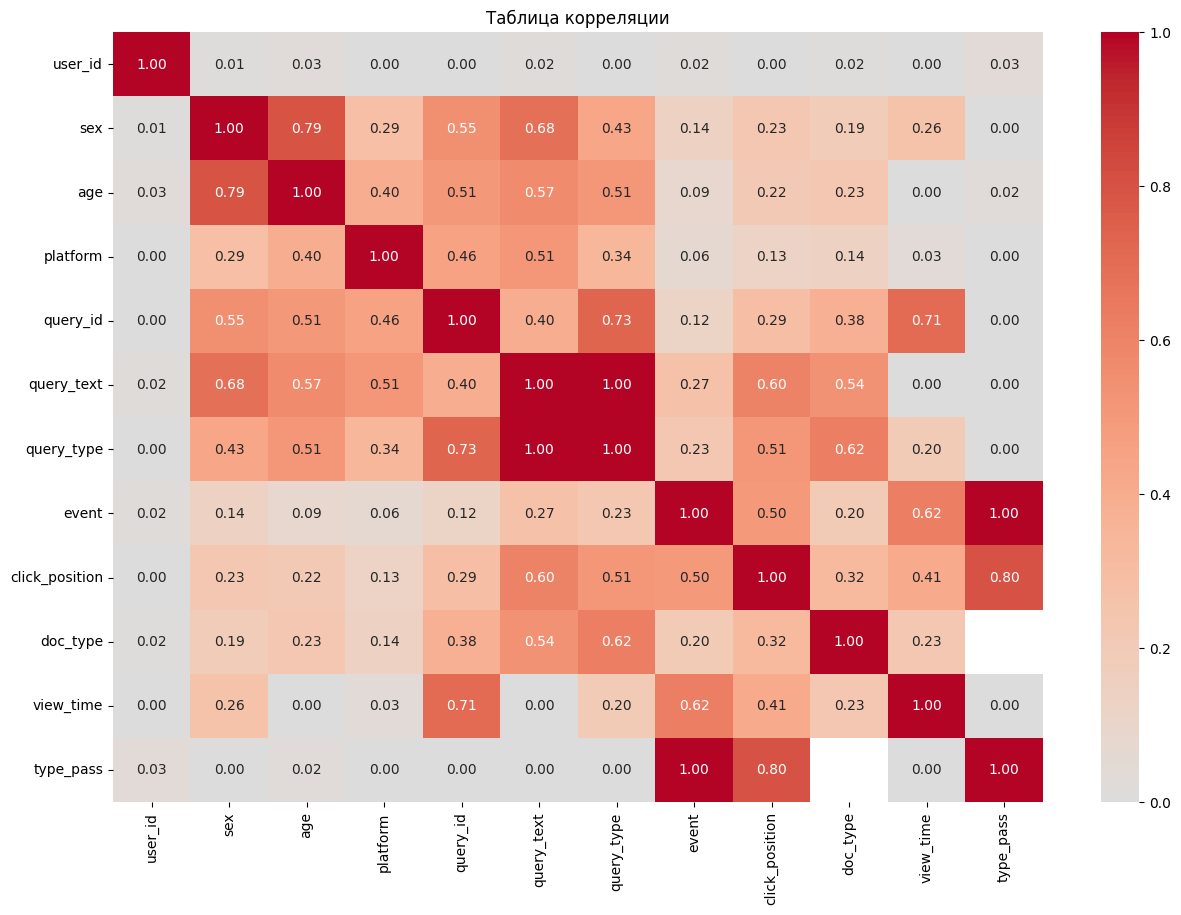

In [33]:
continuous_signs = ['user_id', 'age', 'query_id', 'click_position', 'type_pass']
fig, axes = plt.subplots(figsize=(15, 10))
sns.heatmap(df_type.phik_matrix(interval_cols = continuous_signs),
            center=0,
            annot = True,
            fmt = '.2f',
            cmap='coolwarm',
            ax = axes)
plt.title('Таблица корреляции')
plt.show()

In [34]:
len(df_type[df.event == 'search'])/len(df)*100

24.675790660720693

**Количество пропусков совпадает с количеством значений event='search', что говорит 24.6% пользователей не могут найти нужную информацию в результатах поиска.**

In [35]:
# проверка на наличие явных дубликатов
df.duplicated().sum()

np.int64(0)

In [36]:
# проверка на наличие неявных дубликатов
df.duplicated(subset=['query_id']).sum()

np.int64(1568)

In [37]:
df[df.duplicated(subset = ['query_id'], keep = False)]

,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
8,17370723.0,anonym,0.0,android,46720550.0,поездка или поездочка шоу истории,show,subscribe,9.0,video,0.0
12,46055223.0,female,30.0,android,93486615.0,как играть на бас-гитаре,music,tap,9.0,video,0.0
14,21367173.0,female,16.0,android,5197529.0,будущее музыкальной индустрии,music,tap,15.0,video,0.0
17,42057324.0,male,29.0,iphone,17870585.0,утреннее шоу 2 сезон 3 серия,show,search,0.0,NaN,0.0
29,4871205.0,female,34.0,smart_tv,30679514.0,альтернативная энергетика новости,news,like,23.0,clip,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19961,85100170.0,female,53.0,smart_tv,97888288.0,кто написал музыку к Интерстеллару,music,tap,12.0,clip,0.0
19963,86481421.0,male,28.0,iphone,6721651.0,электронная музыка для тренировок,music,like,18.0,clip,0.0
19983,53660911.0,female,64.0,android_tv,85588024.0,как появился хип-хоп,music,like,11.0,clip,0.0
19987,62146185.0,female,45.0,web,55902740.0,та самая мелодия из тик тока,music,tap,11.0,clip,0.0


In [38]:
df.loc[df['query_id'] == 46720550.0]

,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
8,17370723.0,anonym,0.0,android,46720550.0,поездка или поездочка шоу истории,show,subscribe,9.0,video,0.0
1103,17370723.0,anonym,0.0,android,46720550.0,виральные танцевальные треки,music,tap,12.0,clip,0.0


In [39]:
df.loc[df['query_id'] == 93486615.0]

,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
12,46055223.0,female,30.0,android,93486615.0,как играть на бас-гитаре,music,tap,9.0,video,0.0
18667,46055223.0,female,30.0,android,93486615.0,большое шоу 9 сезон,show,subscribe,14.0,author,0.0


In [40]:
df.loc[df['query_id'] == 5197529.0]

,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
14,21367173.0,female,16.0,android,5197529.0,будущее музыкальной индустрии,music,tap,15.0,video,0.0
10545,35810057.0,male,54.0,smart_tv,5197529.0,вечерние развлекательные программы,show,tap,6.0,author,0.0


In [41]:
# проверка на наличие неявных дубликатов
df.duplicated(subset=['user_id']).sum()

np.int64(3533)

In [42]:
df[df.duplicated(subset = ['user_id'], keep = False)]

,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
5,8004249.0,anonym,0.0,android,19760211.0,как купить билеты на Грибов,music,tap,1.0,author,0.0
7,79473329.0,anonym,0.0,smart_tv,569617620.0,биография Мэрилин Монро,films,tap,5.0,clip,0.0
8,17370723.0,anonym,0.0,android,46720550.0,поездка или поездочка шоу истории,show,subscribe,9.0,video,0.0
12,46055223.0,female,30.0,android,93486615.0,как играть на бас-гитаре,music,tap,9.0,video,0.0
22,38710049.0,male,25.0,web,11239103.0,промышленные технологии новости,news,tap,18.0,playlist,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19982,64200695.0,female,62.0,web,8789414.0,история русского рэпа,music,subscribe,1.0,author,0.0
19983,53660911.0,female,64.0,android_tv,85588024.0,как появился хип-хоп,music,like,11.0,clip,0.0
19986,344304.0,female,28.0,web,78777448.0,ПИФы новости,news,share,17.0,author,0.0
19987,62146185.0,female,45.0,web,55902740.0,та самая мелодия из тик тока,music,tap,11.0,clip,0.0


In [43]:
# рассмотрим отдельные примеры, для выяснения природы дубликатов
df.loc[df['user_id'] == 8004249.0]

,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
5,8004249.0,anonym,0.0,android,19760211.0,как купить билеты на Грибов,music,tap,1.0,author,0.0
6445,8004249.0,anonym,0.0,smart_tv,110904056.0,ужасы с высоким рейтингом,films,view,1.0,video,4554.0


In [44]:
df.loc[df['user_id'] == 79473329.0]

,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
7,79473329.0,anonym,0.0,smart_tv,569617620.0,биография Мэрилин Монро,films,tap,5.0,clip,0.0
14969,79473329.0,female,62.0,iphone,91226487.0,как записать песню дома,music,view,9.0,clip,24.0


#### ВЫВОД: При проверки на наличие явных и неявных дубликатов, было получено. Отсутсвуют явные дубликаты, но присутсвуют неявные. После уточнения и выяснения их природы, было принято решение, оставить без изменений, так как эти неявные дубликаты не имеют схожести, только по user_id или query_id

**Анализ распределения событий**

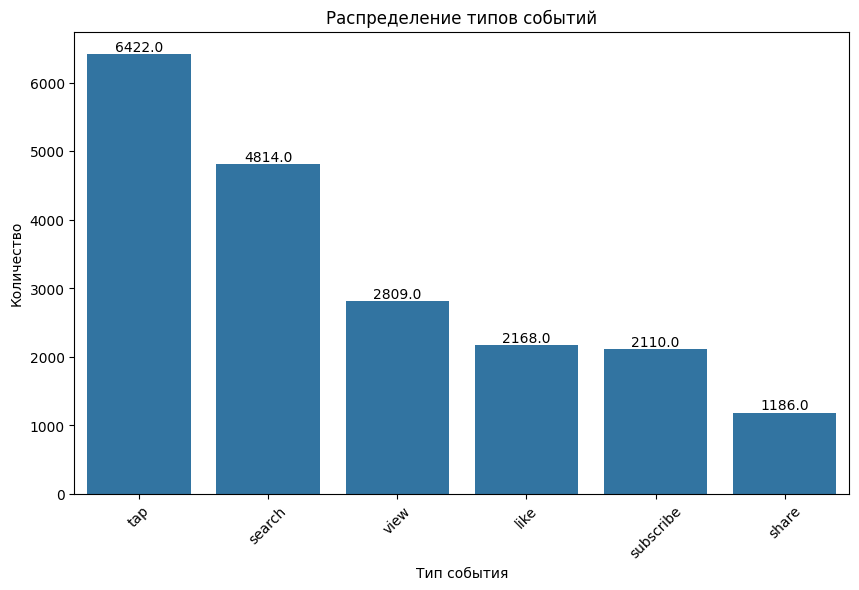

In [45]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='event', order=df['event'].value_counts().index)
plt.title('Распределение типов событий')
plt.xlabel('Тип события')
plt.ylabel('Количество')
plt.xticks(rotation=45)

# Добавление значений над столбцами
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

In [46]:
# Среднее количество tap на один search
print(f"Среднее tap/search: {df[df['event'] == 'tap'].shape[0]/df[df['event'] == 'search'].shape[0]:.2f}")
# Среднее количество view на один search
print(f"Среднее view/search: {df[df['event'] == 'view'].shape[0]/df[df['event'] == 'search'].shape[0]:.2f}")
# Среднее количество like на один search
print(f"Среднее like/search: {df[df['event'] == 'like'].shape[0]/df[df['event'] == 'search'].shape[0]:.2f}")
# Среднее количество subscribe на один search
print(f"Среднее subscribe/search: {df[df['event'] == 'subscribe'].shape[0]/df[df['event'] == 'search'].shape[0]:.2f}")
# Среднее количество share на один search
print(f"Среднее share/search: {df[df['event'] == 'share'].shape[0]/df[df['event'] == 'search'].shape[0]:.2f}")

Среднее tap/search: 1.33
Среднее view/search: 0.58
Среднее like/search: 0.45
Среднее subscribe/search: 0.44
Среднее share/search: 0.25


**Событие share имеет самое маленькое соотношение на один search, на 4 события search приходится 1 событие share.**

**Проведем более подробный анализ событий и рассчитаем конверсию поиска**

In [47]:
search_events = df[df["event"] == "search"].copy()
interacted_query_ids = df[df["event"] != "search"]["query_id"].unique()
search_events["has_interaction"] = search_events["query_id"].isin(interacted_query_ids)
conversion_rate = search_events["has_interaction"].mean()
print(f"Количество поисков: {search_events.shape[0]}")
print(f"Количество уникальных целевых действий: {len(interacted_query_ids)}")
print(f"Конверсия из поиска в действия: {conversion_rate:.2%}")

Количество поисков: 4814
Количество уникальных целевых действий: 13618
Конверсия из поиска в действия: 4.59%


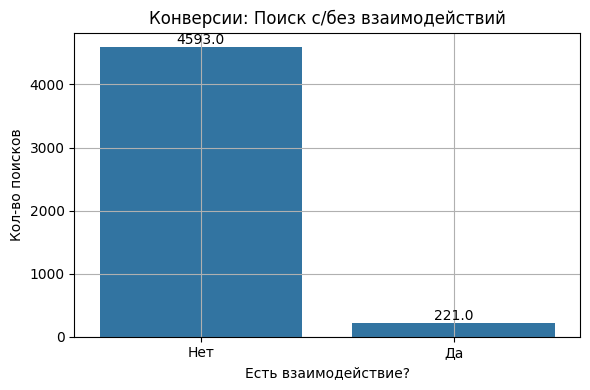

In [48]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=search_events, x='has_interaction', order=search_events['has_interaction'].value_counts().index)
plt.title("Конверсии: Поиск с/без взаимодействий")
plt.xlabel("Есть взаимодействие?")
plt.ylabel("Кол-во поисков")
plt.xticks([0, 1], ["Нет", "Да"])
plt.grid(True)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.show()

**Показывает что многие пользователи, имеющие событие поиска в конечном итоге не находят нужный контент. Лишь 221 query_id что равно 4.59% из общего количества запросов находят взаимодействие. Нужно улучшать алгоритм поиска**

Наиболее частые неудачные поиски:
query_text
альтернативные концовки известных фильмов         25
фильмы про искусственный интеллект                23
самые низкооцененные фильмы на Rotten Tomatoes    23
документальные фильмы про природу                 22
русские фильмы про войну                          22
Золотой глобус номинанты                          21
ужасы с высоким рейтингом                         21
топ 10 сериалов этого года                        21
как выбрать проектор для дома                     20
актеры из фильмов Марвел                          20
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_2824\2377902574.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_problem_queries.values, y=top_problem_queries.index, palette="Reds_r")


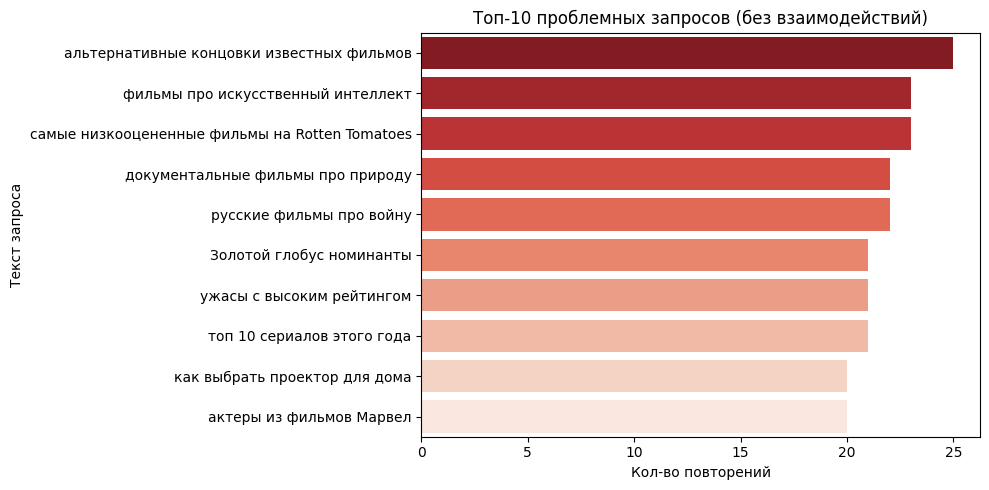

In [49]:
# Проблемные поисковые запросы (поиск без взаимодейтсвия)
problematic_queries = search_events[~search_events["has_interaction"]]
top_problem_queries = problematic_queries["query_text"].value_counts().head(10)
print("Наиболее частые неудачные поиски:")
print(top_problem_queries)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_problem_queries.values, y=top_problem_queries.index, palette="Reds_r")
plt.title("Топ-10 проблемных запросов (без взаимодействий)")
plt.xlabel("Кол-во повторений")
plt.ylabel("Текст запроса")
plt.tight_layout()
plt.show()

**нужно улучшать поисковую систему по альтернативнам концовкам известных фильмов, фильмам про искуственный интеллект,самым низкооцененным фильмам на Rotten Tomatoes и тд. Как видно первые 5 запросов, не имеющих дальнейшего действия так или иначе связаны с фильмами**

C:\Users\user\AppData\Local\Temp\ipykernel_2824\4199288308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click_position'] = df['click_position'].astype(int)


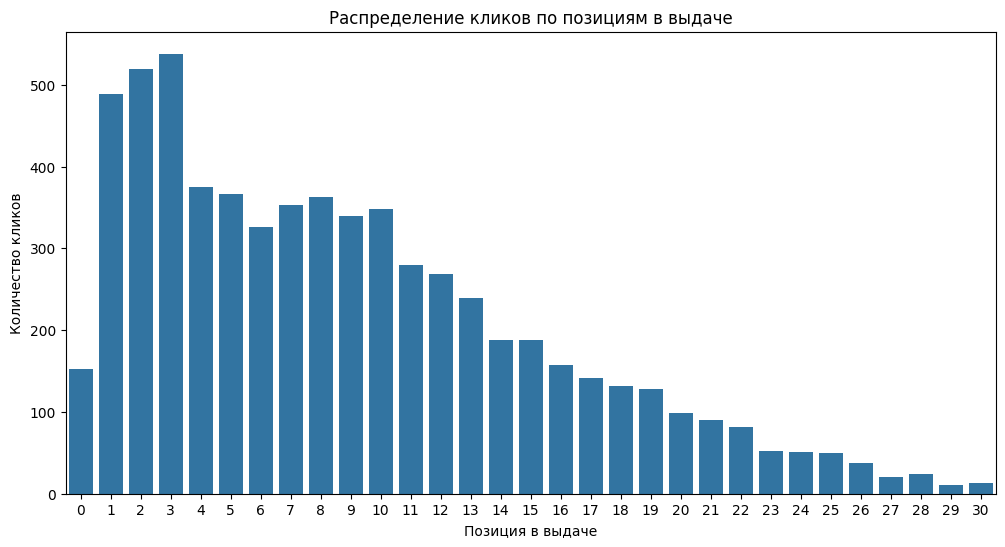

In [50]:
# Распределение позиций кликов
df['click_position'] = df['click_position'].astype(int)
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['event'] == 'tap'], x='click_position')
plt.title('Распределение кликов по позициям в выдаче')
plt.xlabel('Позиция в выдаче')
plt.ylabel('Количество кликов')
plt.show()


**Этот анализ показывает, насколько пользователи вовлекаются в результаты поиска. Большинство кликов на первых позициях, это может указывать на то, что пользователи не находят релевантный контент дальше, но при этом поисковая система хорошо работает, так как показывает релевантные результаты на первых позициях.**

In [51]:
df['age'].describe()

count    19509.000000
mean        30.435030
std         22.462021
min          0.000000
25%         11.000000
50%         31.000000
75%         50.000000
max         69.000000
Name: age, dtype: float64

In [52]:
# Берем только события с кликами (tap)
click_data = df[df['event'] == 'tap'].copy()

# Проверяем распределение позиций кликов
print("Распределение позиций кликов:")
print(click_data['click_position'].describe())

# Создаем категории для позиций кликов
click_data['age_group'] = pd.cut(click_data['age'],5)

Распределение позиций кликов:
count    6422.000000
mean        8.902990
std         6.570578
min         0.000000
25%         3.000000
50%         8.000000
75%        13.000000
max        30.000000
Name: click_position, dtype: float64


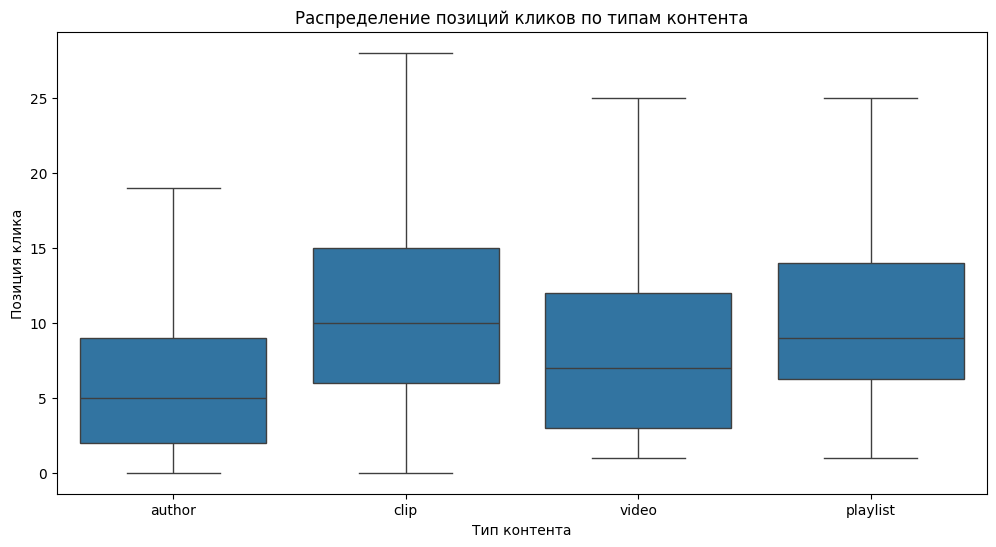


Средняя позиция клика по типам контента:
doc_type
author       6.678913
video        8.309724
playlist    10.497389
clip        10.993010
Name: click_position, dtype: float64


In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=click_data, x='doc_type', y='click_position', showfliers=False)
plt.title('Распределение позиций кликов по типам контента')
plt.xlabel('Тип контента')
plt.ylabel('Позиция клика')
plt.show()

# Средняя позиция по типам контента
mean_position_by_type = click_data.groupby('doc_type')['click_position'].mean().sort_values()
print("\nСредняя позиция клика по типам контента:")
print(mean_position_by_type)

**Поиск по author хороший (позиция клика маленькая), но все типы контента имеют правостороннюю ассиметрию, что говорит о необхиомости улучшения поисковой системы, так как пользователи не могут найти контент на начальных позициях кликов**

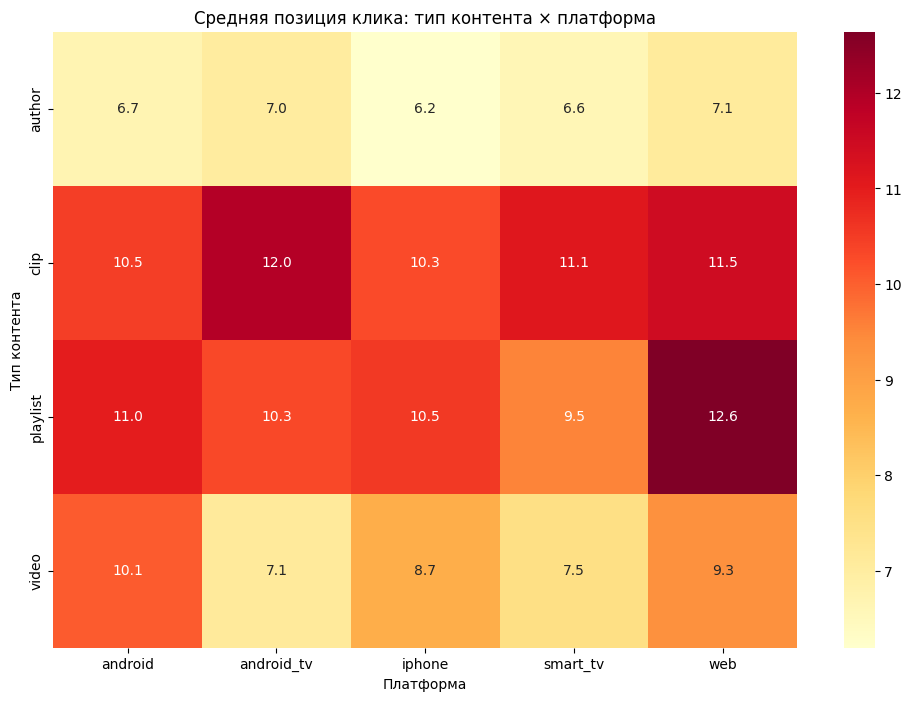

In [54]:
# Тепловая карта: средняя позиция клика по типам контента и платформам
pivot_platform_type = click_data.pivot_table(values='click_position',
                                           index='doc_type',
                                           columns='platform',
                                           aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_platform_type, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Средняя позиция клика: тип контента × платформа')
plt.xlabel('Платформа')
plt.ylabel('Тип контента')
plt.show()

**Необходимо улучшать поисковую систему по playlist и clip и платформу web (почти что на всех типах контентов имеет высокую среднюю позицию клика)**

C:\Users\user\AppData\Local\Temp\ipykernel_2824\1461577.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_age_type = click_data.pivot_table(values='click_position',


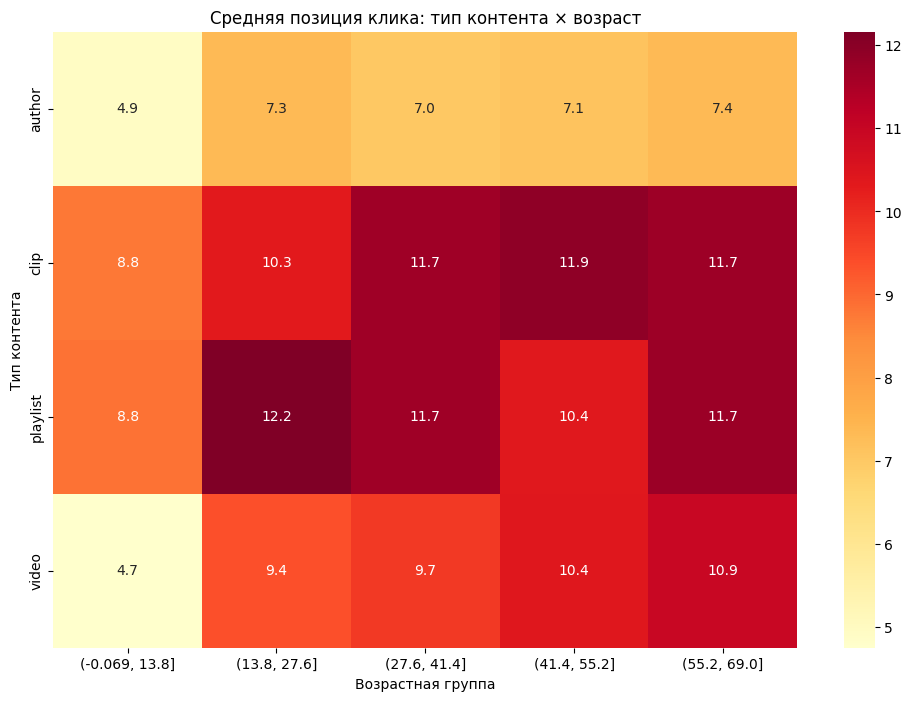

In [55]:
# Тепловая карта: средняя позиция клика по типам контента и возрастам
pivot_age_type = click_data.pivot_table(values='click_position',
                                      index='doc_type',
                                      columns='age_group',
                                      aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_age_type, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Средняя позиция клика: тип контента × возраст')
plt.xlabel('Возрастная группа')
plt.ylabel('Тип контента')
plt.show()

**Можно заметить закономерность, чем больше возраст, тем сложнее найти подходящий контент, но контент author достаточно релевантный по всем возрастам**

C:\Users\user\AppData\Local\Temp\ipykernel_2824\3235767726.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_platform_age = click_data.pivot_table(values='click_position',


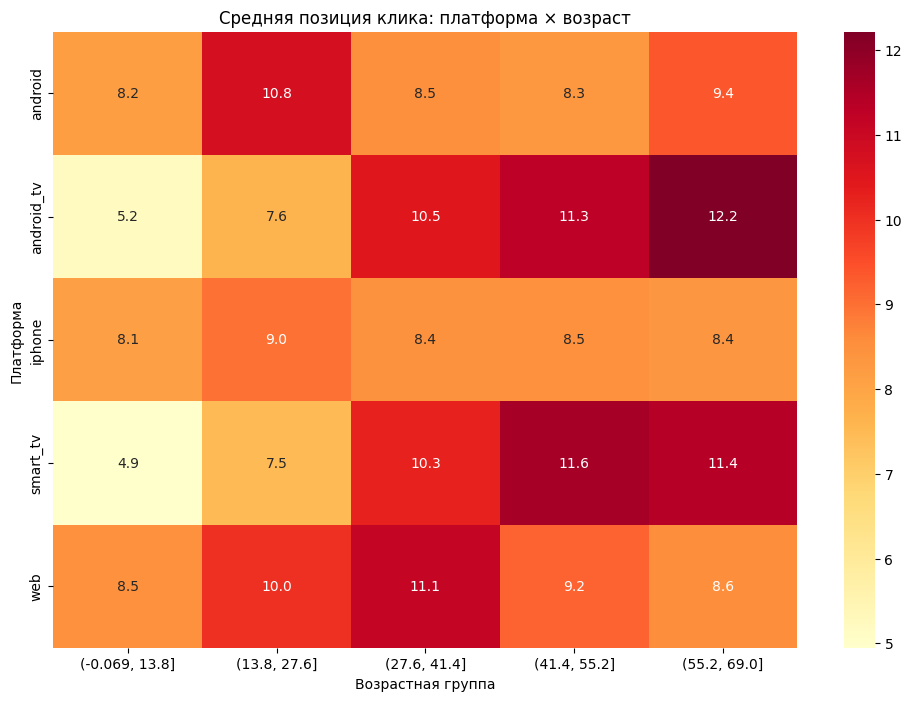

In [56]:
# Тепловая карта: средняя позиция клика по платформам и возрастам
pivot_platform_age = click_data.pivot_table(values='click_position',
                                          index='platform',
                                          columns='age_group',
                                          aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_platform_age, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Средняя позиция клика: платформа × возраст')
plt.xlabel('Возрастная группа')
plt.ylabel('Платформа')
plt.show()

**По tv-платформам чем больше возрастная группа, тем выше средняя позиция клика**

**Время просмотра контента**

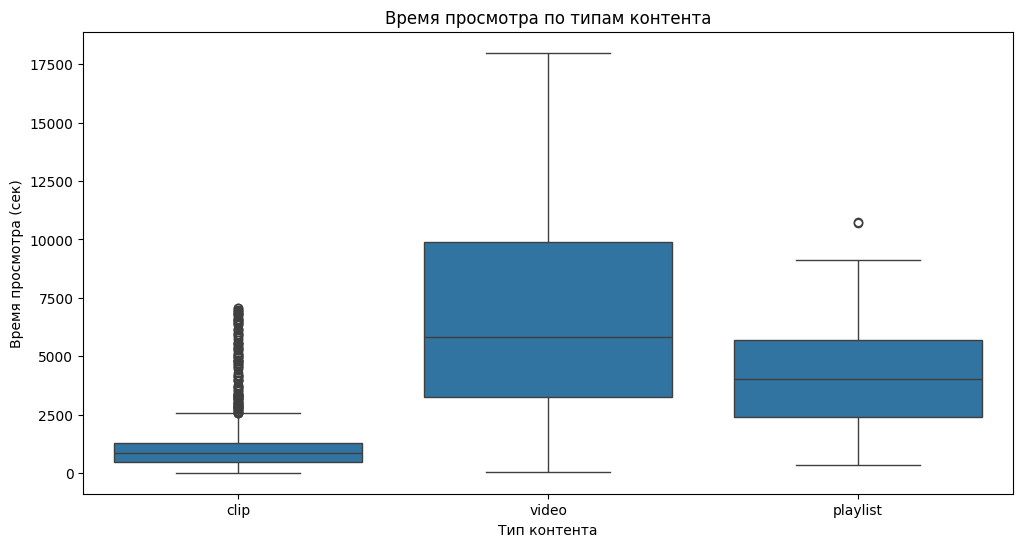

In [57]:
# Распределение времени просмотра по типам контента
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['event'] == 'view'], x='doc_type', y='view_time')
plt.title('Время просмотра по типам контента')
plt.xlabel('Тип контента')
plt.ylabel('Время просмотра (сек)')
plt.show()

**Как можно заметить наибольшее медианное время просмотра имеет video, наименьшее - clip, также можно заметить большое количество выбросов по clip, что говорит о прекрасной работе поисковой системы по clip и дальнейшем изучении этих выбросов. video демонстрирует значительную правостороннюю ассиметрию**

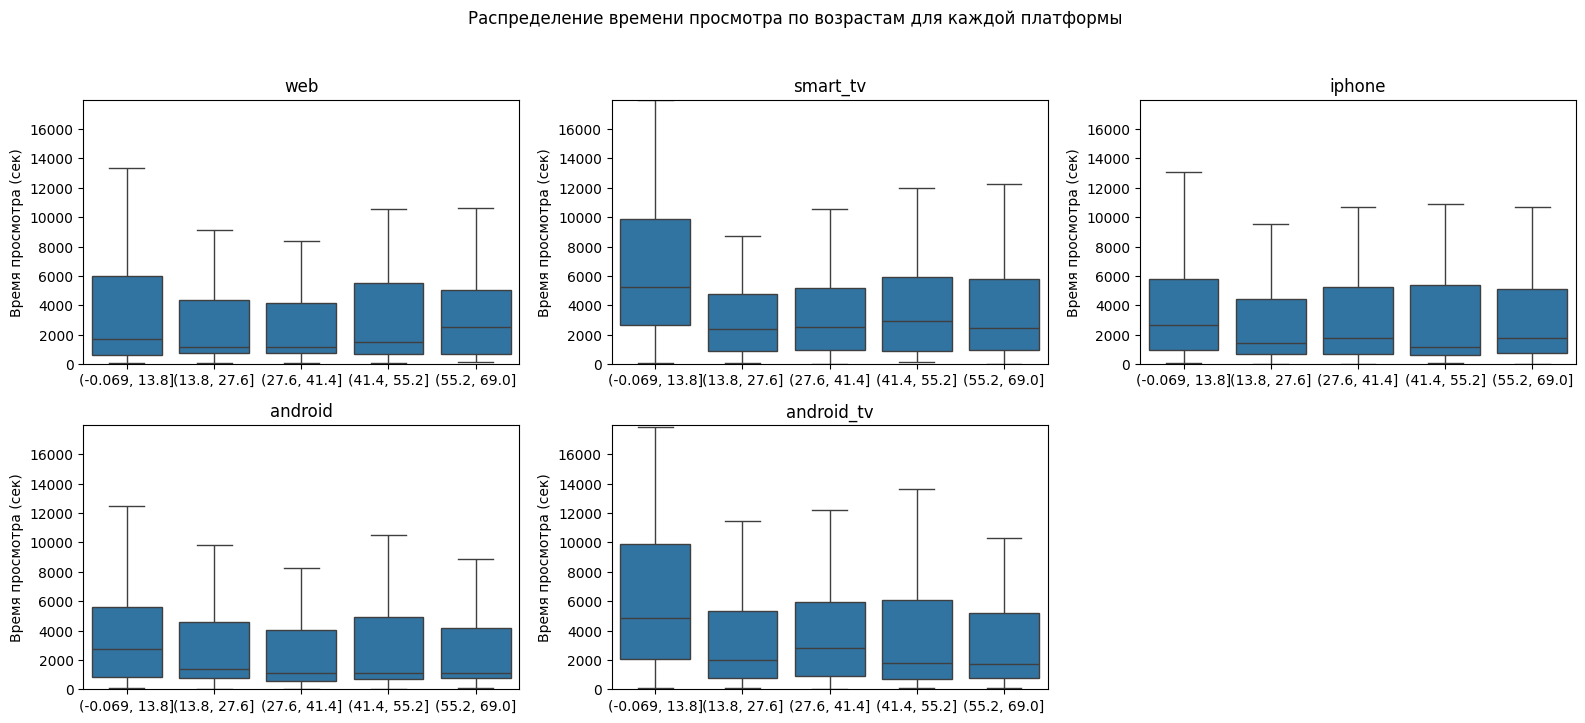

In [58]:
view_data = df[df['event'] == 'view'].copy()
view_data['age_group'] = pd.cut(view_data['age'],5)
plt.figure(figsize=(16, 10))
for i, platform in enumerate(view_data['platform'].unique()):
    plt.subplot(3, 3, i+1)
    platform_data = view_data[view_data['platform'] == platform]
    sns.boxplot(data=platform_data, x='age_group', y='view_time', showfliers=False)
    plt.title(f'{platform}')
    plt.xlabel('')
    plt.ylabel('Время просмотра (сек)')
    plt.ylim(0, view_data['view_time'].quantile(1))
plt.suptitle('Распределение времени просмотра по возрастам для каждой платформы', y=1.02)
plt.tight_layout()
plt.show()

**По всем платформам возрастная группа до 14 лет имеет самые большие 25/50/75% процентили и правостороннюю ассиметрию, демонстрирующую хорошую высокую заинтересованность в контенте, но необходимо улучшать время просмотра по tv-платформам, так как имеется сильная разница в показателях между группами до 14 лет и старше**

C:\Users\user\AppData\Local\Temp\ipykernel_2824\708130446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['search_success'] = df['event'] != 'search'


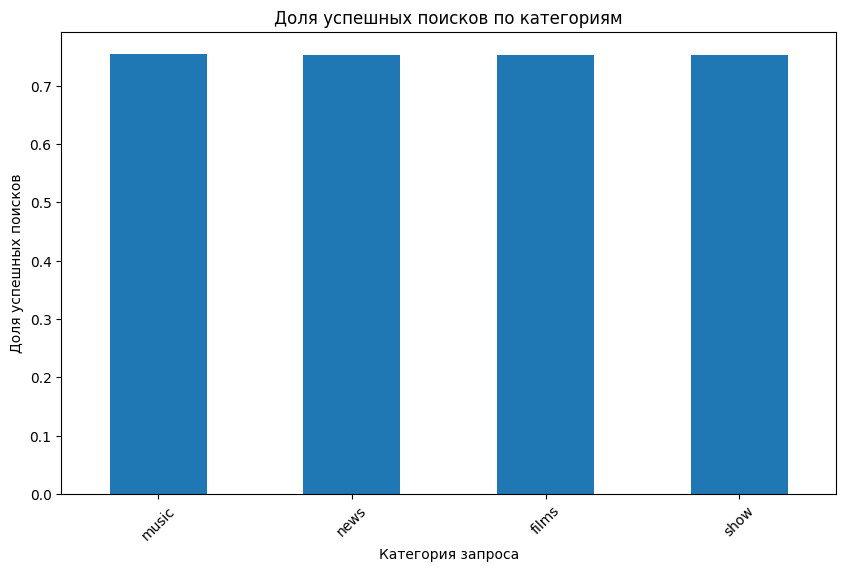

In [59]:
# Создаем метрику "успешности" поиска (например, если было действие кроме search)
df['search_success'] = df['event'] != 'search'

# Группируем по категориям запросов
success_by_category = df.groupby('query_type')['search_success'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
success_by_category.plot(kind='bar')
plt.title('Доля успешных поисков по категориям')
plt.xlabel('Категория запроса')
plt.ylabel('Доля успешных поисков')
plt.xticks(rotation=45)
plt.show()

**Этот анализ показывает, что во всех категориях поиск работает примерно одинаково.**

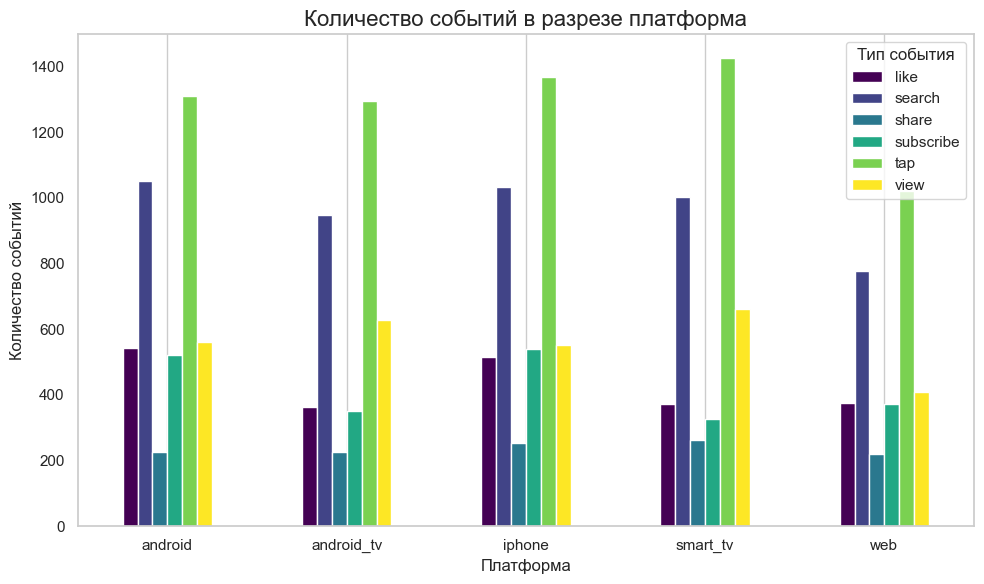

In [197]:
event_counts = df.groupby('platform')['event'].value_counts().unstack(fill_value=0)

# Настройка стиля seaborn
sns.set(style='whitegrid')

# Построение графика
event_counts.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='viridis')

# Добавление заголовков и подписей
plt.title('Количество событий в разрезе платформа', fontsize=16)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Количество событий', fontsize=12)
plt.xticks(rotation=0)  # Поворот меток оси X
plt.legend(title='Тип события')
plt.grid(axis='y')

# Показать график
plt.tight_layout()
plt.show()

**Все платформы показывают одинаковую эффективность, но нужно развивать web (отстает от других платформ)**